In [17]:
# Install GeoPandas and Folium requirements
%pip install -q geopandas folium


Note: you may need to restart the kernel to use updated packages.


In [18]:
# Import libraries
import pandas as pd
import geopandas as gpd
import folium


In [19]:
# Load and display a sample GeoDataFrame
minneapolis_zoning = gpd.read_file(
    "https://services.arcgis.com/afSMGVsC7QlRK1kZ/arcgis/rest/services/Planning_Primary_Zoning/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
)
minneapolis_zoning["Land_Use_With_Code"] = (
    minneapolis_zoning["Land_Use"]
    + " ("
    + minneapolis_zoning["Land_Use_Code"].astype(str)
    + ")"
)
minneapolis_zoning


OBJECTID                      Land_Use Land_Use_Code  RuleID  \
0            1  Residence Goods and Services           RM1     9.0   
1            2        Neighborhood Mixed Use           CM1     1.0   
2            3        Neighborhood Mixed Use           CM1     1.0   
3            4          Urban Neighborhood 2           UN2    14.0   
4            5          Urban Neighborhood 3           UN3    15.0   
...        ...                           ...           ...     ...   
1254      1255  Residence Goods and Services           RM1     NaN   
1255      1256        Neighborhood Mixed Use           CM1     1.0   
1256      1257          Urban Neighborhood 3           UN3    15.0   
1257      1258           Community Mixed Use           CM3     3.0   
1258      1259  Residence Goods and Services           RM1     9.0   

        Shape__Area  Shape__Length  \
0      15994.910156     764.878945   
1     200440.085938    3108.958708   
2       7054.164062     383.059472   
3     101409.589844    1883.919060   
4     236796.332031    3729.634584   
...             ...            ...   
1254   75522.187634    1446.514524   
1255    1813.054688     171.985610   
1256     771.996094     114.804754   
1257   25280.101562     663.575011   
1258  149746.617188    3276.974600   

                                               geometry  \
0     POLYGON ((-93.23025 44.98469, -93.22915 44.984...   
1     POLYGON ((-93.29769 44.94659, -93.29766 44.946...   
2     POLYGON ((-93.2696 44.95952, -93.26885 44.9595...   
3     POLYGON ((-93.21831 44.98744, -93.21794 44.987...   
4     POLYGON ((-93.31164 44.9339, -93.31152 44.9339...   
...                                                 ...   
1254  POLYGON ((-93.30757 45.00213, -93.30757 45.000...   
1255  POLYGON ((-93.22028 44.94172, -93.22006 44.941...   
1256  POLYGON ((-93.29116 44.9412, -93.29117 44.9410...   
1257  POLYGON ((-93.26204 44.94766, -93.26201 44.947...   
1258  POLYGON ((-93.2631 45.00649, -93.2631 45.00639...   

                      Land_Use_With_Code  
0     Residence Goods and Services (RM1)  
1           Neighborhood Mixed Use (CM1)  
2           Neighborhood Mixed Use (CM1)  
3             Urban Neighborhood 2 (UN2)  
4             Urban Neighborhood 3 (UN3)  
...                                  ...  
1254  Residence Goods and Services (RM1)  
1255        Neighborhood Mixed Use (CM1)  
1256          Urban Neighborhood 3 (UN3)  
1257           Community Mixed Use (CM3)  
1258  Residence Goods and Services (RM1)  

[1259 rows x 8 columns]

<Axes: >

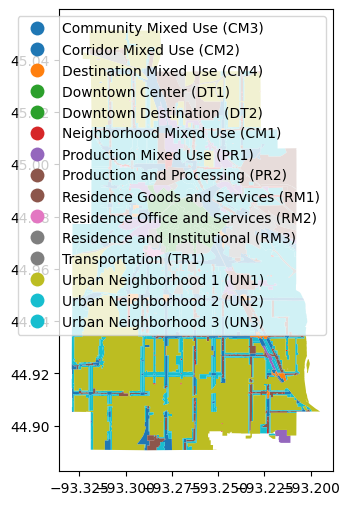

In [20]:
minneapolis_zoning.plot(column="Land_Use_With_Code", legend=True, figsize=(10, 6))


In [21]:
# Render a simple map centered on Minneapolis containing the geometries
m = folium.Map(location=[44.9778, -93.2650], zoom_start=12)
popup = folium.GeoJsonPopup(fields=["Land_Use", "Land_Use_Code"])
mpls_zoning = folium.GeoJson(
    minneapolis_zoning,
    # Color residential zones green and commercial zones orange
    style_function=lambda feature: {
        "fillColor": "green"
        if feature["properties"]["Land_Use_Code"].startswith("U")
        else "orange",
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.5,
    },
    popup=popup,
    popup_keep_highlighted=True,
    tooltip=folium.GeoJsonTooltip(fields=["Land_Use", "Land_Use_Code"]),
).add_to(m)
m
